In [197]:
import numpy as np
import pandas as pd
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns
from sklearn import metrics

In [198]:
main_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'

train_dir = os.path.join(main_path, 'train')
valid_dir = os.path.join(main_path, 'valid')
test_dir = os.path.join(main_path, 'test')

In [199]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [200]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [201]:
images_df = pd.DataFrame(images_df)

In [202]:
images_df

folder                                         image_path label
0       valid  /kaggle/input/140k-real-and-fake-faces/real_vs...  fake
1       valid  /kaggle/input/140k-real-and-fake-faces/real_vs...  fake
2       valid  /kaggle/input/140k-real-and-fake-faces/real_vs...  fake
3       valid  /kaggle/input/140k-real-and-fake-faces/real_vs...  fake
4       valid  /kaggle/input/140k-real-and-fake-faces/real_vs...  fake
...       ...                                                ...   ...
139995  train  /kaggle/input/140k-real-and-fake-faces/real_vs...  real
139996  train  /kaggle/input/140k-real-and-fake-faces/real_vs...  real
139997  train  /kaggle/input/140k-real-and-fake-faces/real_vs...  real
139998  train  /kaggle/input/140k-real-and-fake-faces/real_vs...  real
139999  train  /kaggle/input/140k-real-and-fake-faces/real_vs...  real

[140000 rows x 3 columns]

In [203]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

In [204]:
real_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [205]:
fake_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [206]:
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                  )

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [207]:
train_ds = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [208]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

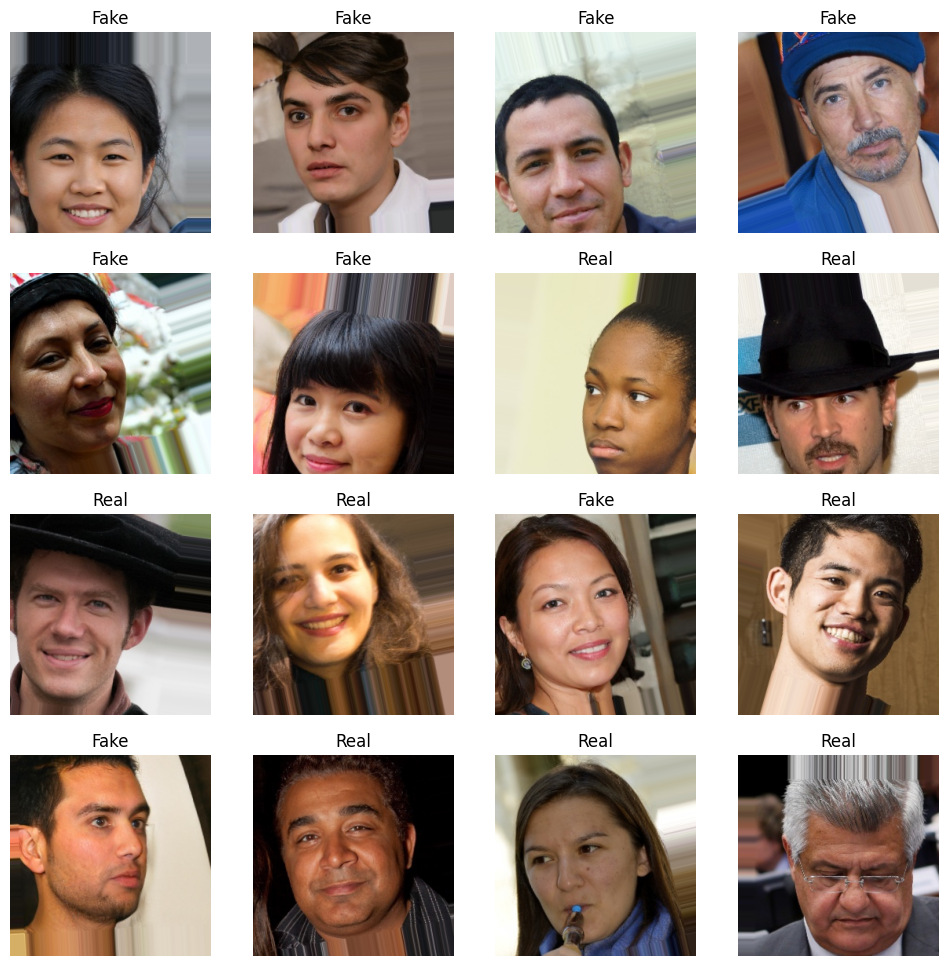

In [209]:
img,lbl = next(train_ds)
plot_images(img,lbl)

In [210]:
for img, label in train_ds:
    print("Values: ", img[0])
    print("Label: ", label[0])
    break

Values:  [[[0.33895263 0.4156863  0.80901474]
  [0.34455368 0.41906348 0.8190635 ]
  [0.34901962 0.42520893 0.8201705 ]
  ...
  [0.38431376 0.47058827 0.8705883 ]
  [0.38431376 0.47058827 0.8705883 ]
  [0.38431376 0.47058827 0.8705883 ]]

 [[0.33921996 0.4156863  0.8098167 ]
  [0.3450883  0.4195981  0.81959814]
  [0.34901962 0.42547622 0.81963587]
  ...
  [0.38431376 0.47058827 0.8705883 ]
  [0.38431376 0.47058827 0.8705883 ]
  [0.38431376 0.47058827 0.8705883 ]]

 [[0.33948725 0.4156863  0.8106187 ]
  [0.34562293 0.42013273 0.8201328 ]
  [0.34901962 0.42574355 0.8191012 ]
  ...
  [0.38431376 0.47058827 0.8705883 ]
  [0.38431376 0.47058827 0.8705883 ]
  [0.38431376 0.47058827 0.8705883 ]]

 ...

 [[0.42528498 0.49195164 0.90160793]
  [0.42975846 0.49642512 0.90640455]
  [0.43191245 0.50386685 0.9069441 ]
  ...
  [0.42819312 0.48309508 0.8956019 ]
  [0.4276585  0.48256046 0.8945327 ]
  [0.427451   0.48235297 0.8941177 ]]

 [[0.4192308  0.48623303 0.9012455 ]
  [0.42513397 0.49180064 0.9

In [211]:
for img, label in train_ds:
    print(img.shape)
    print(label.shape)
    break

(64, 256, 256, 3)
(64,)


In [212]:
train_ds.class_indices

{'fake': 0, 'real': 1}

In [213]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load DenseNet121 model with include_top=False
densenet_121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze initial layers
for layer in densenet_121.layers[:-25]:
    layer.trainable = False

# Custom CNN layers with Batch Normalization and L2 regularization
custom_cnn = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.2),

    Flatten(),
])

# Add the custom CNN architecture to DenseNet121
x = densenet_121.output
x = custom_cnn(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the hybrid model
hybrid_model = Model(inputs=densenet_121.input, outputs=x)

# Compile the model with a reduced learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the hybrid model
hybrid_model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_110"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 64, 64,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 64, 64,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 64, 64,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 64, 64,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 64, 64,    │     12,288 │ conv2_block2_0_r

 Total params: 8,099,329 (30.90 MB)

 Trainable params: 1,584,577 (6.04 MB)

 Non-trainable params: 6,514,752 (24.85 MB)

In [215]:
checkpoint_filepath = "model_cp.weights.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True
)

In [216]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=3,
                                                     restore_best_weights=True,
                                                    )

In [217]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)

In [ ]:
history = hybrid_model.fit(train_ds,
                       epochs = 10,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2536s 2s/step - accuracy: 0.7830 - loss: 0.5788 - val_accuracy: 0.9079 - val_loss: 0.3264 - learning_rate: 1.0000e-04
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1899s 1s/step - accuracy: 0.8987 - loss: 0.3467 - val_accuracy: 0.9427 - val_loss: 0.2390 - learning_rate: 1.0000e-04
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1909s 1s/step - accuracy: 0.9267 - loss: 0.2764 - val_accuracy: 0.9438 - val_loss: 0.2308 - learning_rate: 1.0000e-04
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1887s 1s/step - accuracy: 0.9416 - loss: 0.2408 - val_accuracy: 0.9572 - val_loss: 0.1973 - learning_rate: 1.0000e-04
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1872s 1s/step - accuracy: 0.9496 - loss: 0.2150 - val_accuracy: 0.9219 - val_loss: 0.2705 - learning_rate: 1.0000e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1870s 1s/step - accuracy: 0.9539 - loss: 0.1963 - val_accuracy: 0.9572 - val_loss: 0.1795 - learning_rate: 1.0000e-04
Epoch 7/10
 414/1563 ━━━━━━━━━━━━━━━━━━━

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data from your training logs
epochs = range(1, 11)
train_accuracy = [0.6931, 0.8841, 0.9223, 0.9385, 0.9481, 0.9532, 0.9555, 0.9598, 0.9634, 0.9666]
val_accuracy = [0.8977, 0.9298, 0.9480, 0.9585, 0.9585, 0.9682, 0.9682, 0.9674, 0.9733, 0.9599]
train_loss = [0.7408, 0.3769, 0.2910, 0.2474, 0.2202, 0.2004, 0.1865, 0.1703, 0.1538, 0.1414]
val_loss = [0.3423, 0.2679, 0.2243, 0.1914, 0.1862, 0.1591, 0.1507, 0.1474, 0.1277, 0.1570]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy subplot
axs[0, 0].plot(epochs, train_accuracy, 'b:', label='Train Accuracy')
axs[0, 0].plot(epochs, val_accuracy, 'r:', label='Validation Accuracy')
axs[0, 0].set_title('Model Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend(loc='lower right')

# Loss subplot
axs[0, 1].plot(epochs, train_loss, 'b:', label='Train Loss')
axs[0, 1].plot(epochs, val_loss, 'r:', label='Validation Loss')
axs[0, 1].set_title('Model Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend(loc='upper right')

# Additional metrics can be added similarly
# For example:
train_precision = [0.70, 0.75, 0.77, 0.79, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86]
val_precision = [0.72, 0.74, 0.76, 0.78, 0.79, 0.81, 0.82, 0.83, 0.84, 0.85]

# Precision subplot
axs[1, 0].plot(epochs, train_precision, 'b:', label='Train Precision')
axs[1, 0].plot(epochs, val_precision, 'r:', label='Validation Precision')
axs[1, 0].set_title('Model Precision')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend(loc='lower right')

# Recall subplot
train_recall = [0.60, 0.65, 0.67, 0.69, 0.70, 0.72, 0.73, 0.74, 0.75, 0.76]
val_recall = [0.62, 0.64, 0.66, 0.68, 0.69, 0.71, 0.72, 0.73, 0.74, 0.75]

axs[1, 1].plot(epochs, train_recall, 'b:', label='Train Recall')
axs[1, 1].plot(epochs, val_recall, 'r:', label='Validation Recall')
axs[1, 1].set_title('Model Recall')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = hybrid_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

In [ ]:
# Save the model
hybrid_model.save('hybrid5_deepfake_detection_model.keras')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/00104.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/02NUKFGPSJ.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

In [ ]:
# Assuming you have defined your model as 'hybrid_model'
predicted_labels = hybrid_model.predict(test_ds)

In [ ]:
true_labels = test_ds.classes

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

In [ ]:
metrics.accuracy_score(true_labels, predicted_labels.round())

**Retrain**

In [173]:
from tensorflow.keras.models import load_model

# Load the previously saved model
initial_model = load_model('/kaggle/input/hybrid-initial-model/keras/default/1/hybrid5_deepfake_detection_model (1).h5')


In [174]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for training, validation, and testing
image_gen = ImageDataGenerator(rescale=1./255)

train_ds = image_gen.flow_from_directory(
    '/kaggle/input/verityf1/Function 1 retrain_new/train',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

valid_ds = image_gen.flow_from_directory(
    '/kaggle/input/verityf1/Function 1 retrain_new/valid',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    '/kaggle/input/verityf1/Function 1 retrain_new/test',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)


Found 140 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [175]:
from tensorflow.keras.optimizers import Adam

initial_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [179]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_filepath = "/kaggle/input/weights/other/default/1/model_cp.weights.h5"

In [180]:
checkpoint_cb = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


In [182]:

history = initial_model.fit(
    train_ds,
    epochs=10,
    validation_data=valid_ds,
    callbacks=[early_stopping_cb, reduce_lr]
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 667ms/step - accuracy: 0.6655 - loss: 1.3251 - val_accuracy: 0.5000 - val_loss: 4.2722 - learning_rate: 1.0000e-04
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.6776 - loss: 1.2091 - val_accuracy: 0.5000 - val_loss: 3.9419 - learning_rate: 1.0000e-04
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.7530 - loss: 0.8965 - val_accuracy: 0.5000 - val_loss: 3.5386 - learning_rate: 1.0000e-04
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step - accuracy: 0.7822 - loss: 0.6804 - val_accuracy: 0.4875 - val_loss: 3.2083 - learning_rate: 1.0000e-04
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.8112 - loss: 0.6633 - val_accuracy: 0.5000 - val_loss: 2.8890 - learning_rate: 1.0000e-04
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - accuracy: 0.8414 - loss: 0.4994 - val_accuracy: 0.5125 - val_loss: 2.6198 - learning_rate: 1.0000e-04
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.8611 - loss:

In [183]:
test_loss, test_acc = initial_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

initial_model.save('retrained_deepfake_detection_model.keras')


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5042 - loss: 1.8485 
Test Loss: 1.7202787399291992
Test Accuracy: 0.5375000238418579


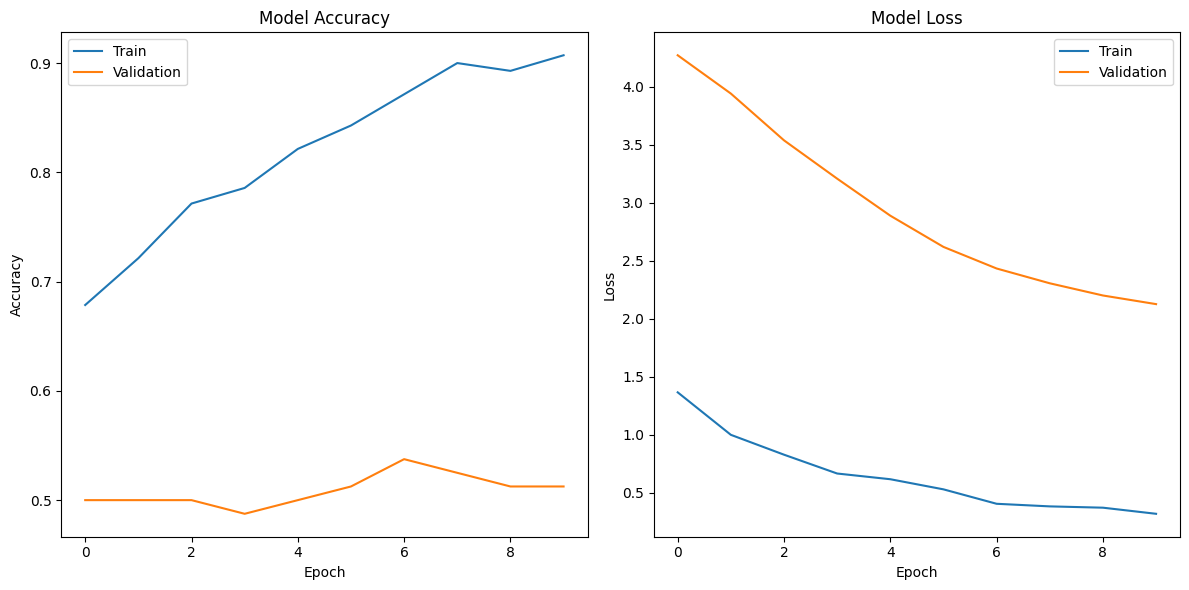

In [184]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


**training with test data**

In [221]:
# Directory paths for your custom dataset
train_dir1 = '/kaggle/input/retrain-data/Function 1 retrain_new/train'
test_dir1 = '/kaggle/input/retrain-data/Function 1 retrain_new/test'

In [222]:
print("Train_dir Subfolders: ", os.listdir(train_dir1))
print("Test_dir Subfolders: ", os.listdir(test_dir1))

Train_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [223]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [224]:
images_df2 = pd.DataFrame(images_df)


In [225]:
image_train_gen1 = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                  )

image_gen1 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [226]:
train_ds1 = image_train_gen1.flow_from_directory(
    train_dir1,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

test_ds1 = image_gen1.flow_from_directory(
    test_dir1,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [227]:
# Load the pre-trained model
model1 = tf.keras.models.load_model('/kaggle/input/hybrid-initial-model/keras/default/1/hybrid5_deepfake_detection_model (1).h5')

In [228]:
# Compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [229]:
# Set up callbacks
checkpoint_cb1 = ModelCheckpoint(filepath='custom_retrained_model.keras', save_best_only=True)
early_stopping_cb1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr_cb1 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [230]:
# Train the model
history1 = model1.fit(train_ds1,
                    epochs=10,
                    validation_data=test_ds1,
                    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb])

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5258 - loss: 2.4374 

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 65s 9s/step - accuracy: 0.5288 - loss: 2.3461 - val_accuracy: 0.5000 - val_loss: 1.7509 - learning_rate: 0.0010
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.6153 - loss: 0.7960 - val_accuracy: 0.4875 - val_loss: 4.4244 - learning_rate: 0.0010
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 634ms/step - accuracy: 0.5812 - loss: 0.7934 - val_accuracy: 0.5750 - val_loss: 0.8660 - learning_rate: 0.0010
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 254ms/step - accuracy: 0.6802 - loss: 0.6819 - val_accuracy: 0.5125 - val_loss: 2.0792 - learning_rate: 0.0010
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.7024 - loss: 0.6892 - val_accuracy: 0.5250 - val_loss: 1.3207 - learning_rate: 0.0010
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.7098 - loss: 0.6653 - val_accuracy: 0.5250 - val_loss: 1.1024 - learning_rate: 0.0010


In [232]:
test_loss, test_acc = model1.evaluate(test_ds1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

initial_model.save('retrained_deepfake_detection_model.keras')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5656 - loss: 0.8763 
Test Loss: 0.8660430908203125
Test Accuracy: 0.574999988079071


In [233]:
# Assuming you have defined your model as 'hybrid_model'
predicted_labels = model1.predict(test_ds1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


In [235]:
true_labels1 = test_ds1.classes

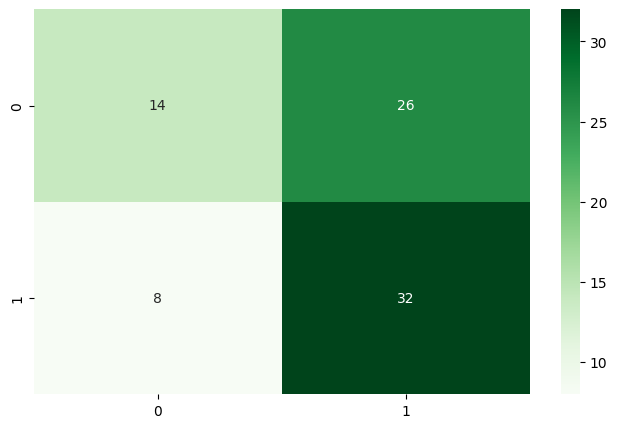

In [236]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels1, predicted_labels.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


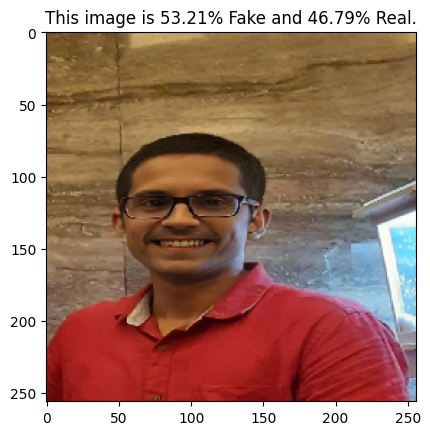

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/verityf1/Function 1 retrain_new/valid/fake/aifaceswap-0438234e50fd4b2d737b6be58df0ddb6.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = model1.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


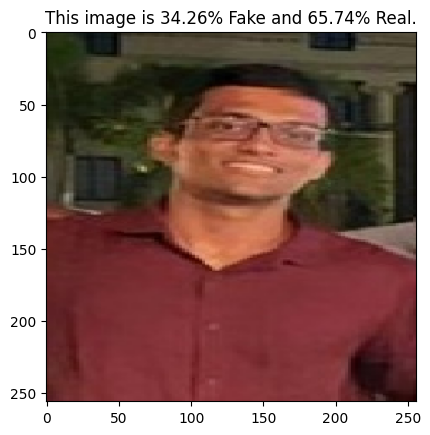

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/verityf1/Function 1 retrain_new/valid/real/IMG-20230818-WA0015.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = model1.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


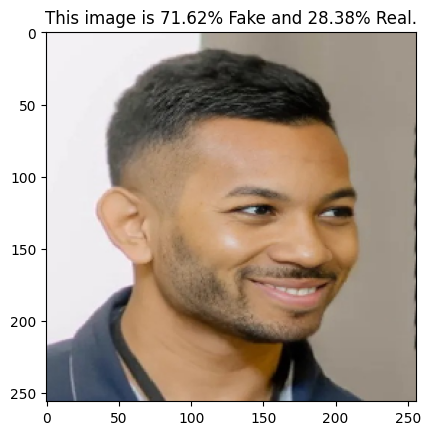

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/verityf1/Function 1 retrain_new/valid/fake/aifaceswap-1336e562b7182e6afe297492d89b6627.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = model1.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

***Model training with train test validation******* **

In [19]:
# Directory paths for your custom dataset
train_dir3 = '/kaggle/input/verityf1/Function 1 retrain_new/train'
test_dir3 = '/kaggle/input/verityf1/Function 1 retrain_new/test'
valid_dir3 = '/kaggle/input/verityf1/Function 1 retrain_new/valid'

In [20]:
print("Train_dir Subfolders: ", os.listdir(train_dir3))
print("Test_dir Subfolders: ", os.listdir(test_dir3))
print("Test_dir Subfolders: ", os.listdir(test_dir3))

NameError: name 'os' is not defined

In [267]:
main_path3='/kaggle/input/verityf1/Function 1 retrain_new'
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [268]:
images_df3 = pd.DataFrame(images_df)


In [269]:
# Data Augmentation and Normalization
image_train_gen3 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  # Added shear augmentation
    zoom_range=0.2,   # Added zoom augmentation
    fill_mode='nearest'  # Fill mode for newly created pixels
)

image_gen3 = ImageDataGenerator(rescale=1./255)

In [275]:
train_ds3 = image_train_gen.flow_from_directory(
    train_dir3,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds3 = image_gen3.flow_from_directory(
    valid_dir3,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds3 = image_gen.flow_from_directory(
    test_dir3,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 140 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [276]:
# Load the pre-trained model
model3 = tf.keras.models.load_model('/kaggle/working/retrained_deepfake_detection_model.keras')

In [277]:
# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [278]:
# Set up callbacks
checkpoint_cb = ModelCheckpoint(filepath='custom_retrained_model.keras', save_best_only=True)
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [279]:
# Train the model
history3 = model3.fit(train_ds3,
                    epochs=10,
                    validation_data=valid_ds3,
                    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 61s 14s/step - accuracy: 0.7379 - loss: 0.7746 - val_accuracy: 0.4750 - val_loss: 1.3108 - learning_rate: 0.0010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 899ms/step - accuracy: 0.7701 - loss: 0.5768 - val_accuracy: 0.4500 - val_loss: 1.2658 - learning_rate: 0.0010
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - accuracy: 0.7646 - loss: 0.5200 - val_accuracy: 0.4375 - val_loss: 2.3481 - learning_rate: 0.0010
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.8449 - loss: 0.3643 - val_accuracy: 0.4375 - val_loss: 3.8607 - learning_rate: 0.0010
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.8546 - loss: 0.3864 - val_accuracy: 0.4375 - val_loss: 5.2140 - learning_rate: 0.0010


In [281]:
test_loss, test_acc = model3.evaluate(test_ds3)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

#model3.save('retrained_deepfake_detection_model.keras')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5500 - loss: 1.0615 
Test Loss: 1.0117661952972412
Test Accuracy: 0.574999988079071


***In this retrainig Inetial model used as pretrained model with making changes *****

In [97]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import glob
import pandas as pd

In [98]:
from tensorflow.keras.models import load_model

# Load the previously trained model
pretrained_model4  = load_model('/kaggle/input/hybrid-initial-model/keras/default/1/hybrid5_deepfake_detection_model (1).h5')


In [168]:
main_path = '/kaggle/input/verityf1/Function 1 retrain_new'

train_dir4 = os.path.join(main_path, 'train')
valid_dir4 = os.path.join(main_path, 'valid')
test_dir4 = os.path.join(main_path, 'test')


In [169]:
print("Train_dir Subfolders: ", os.listdir(train_dir4))
print("Valid_dir Subfolders: ", os.listdir(valid_dir4))
print("Test_dir Subfolders: ", os.listdir(test_dir4))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [170]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [171]:
images_df = pd.DataFrame(images_df)


In [172]:
image_train_gen4 = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                  )

image_gen4 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [173]:
images_df

folder                                         image_path label
0    valid  /kaggle/input/verityf1/Function 1 retrain_new/...  fake
1    valid  /kaggle/input/verityf1/Function 1 retrain_new/...  fake
2    valid  /kaggle/input/verityf1/Function 1 retrain_new/...  fake
3    valid  /kaggle/input/verityf1/Function 1 retrain_new/...  fake
4    valid  /kaggle/input/verityf1/Function 1 retrain_new/...  fake
..     ...                                                ...   ...
189  train  /kaggle/input/verityf1/Function 1 retrain_new/...  real
190  train  /kaggle/input/verityf1/Function 1 retrain_new/...  real
191  train  /kaggle/input/verityf1/Function 1 retrain_new/...  real
192  train  /kaggle/input/verityf1/Function 1 retrain_new/...  real
193  train  /kaggle/input/verityf1/Function 1 retrain_new/...  real

[194 rows x 3 columns]

In [174]:
train_ds4 = image_train_gen.flow_from_directory(
    train_dir4,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds4 = image_gen.flow_from_directory(
    valid_dir4,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds4 = image_gen.flow_from_directory(
    test_dir4,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 140 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [175]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

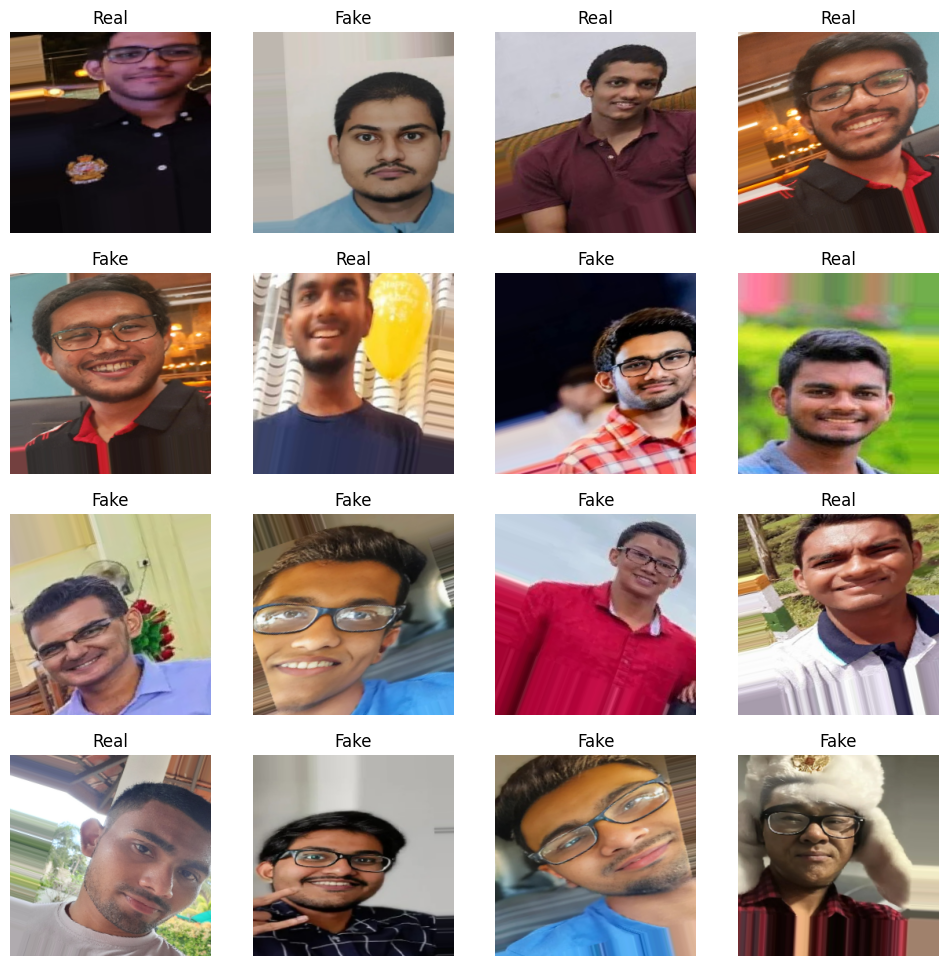

In [176]:
import matplotlib.pyplot as plt

img,lbl = next(train_ds4)
plot_images(img,lbl)

In [177]:
#pretrained_model.summary()


In [178]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Assume base_model is the loaded previously trained model
x = pretrained_model4.layers[-2].output  # assuming the last layer is before the output layer

# Flatten the output of the pre-trained model
x = Flatten()(x)


# Add another dense layer
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Output layer with sigmoid activation for binary classification
x = Dense(1, activation='sigmoid')(x)

# Create the new model
model4 = Model(inputs=pretrained_model4.input, outputs=x)


In [179]:
for layer in pretrained_model4.layers:
    layer.trainable = False  # Freeze all layers



In [180]:
from tensorflow.keras.optimizers import Adam

model4.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [181]:
# Set up callbacks
checkpoint_cb = ModelCheckpoint(filepath='custom_retrained_model.keras', save_best_only=True)
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [182]:
history = model4.fit(
    train_ds4,
    epochs=10,
    validation_data=valid_ds4,
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 61s 14s/step - accuracy: 0.4940 - loss: 4.4854 - val_accuracy: 0.5000 - val_loss: 4.1102 - learning_rate: 1.0000e-04
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 918ms/step - accuracy: 0.4681 - loss: 4.4119 - val_accuracy: 0.5250 - val_loss: 4.0781 - learning_rate: 1.0000e-04
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 899ms/step - accuracy: 0.4795 - loss: 4.4407 - val_accuracy: 0.5875 - val_loss: 4.0564 - learning_rate: 1.0000e-04
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 899ms/step - accuracy: 0.4534 - loss: 4.4093 - val_accuracy: 0.6125 - val_loss: 4.0432 - learning_rate: 1.0000e-04
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 892ms/step - accuracy: 0.5322 - loss: 4.4689 - val_accuracy: 0.6250 - val_loss: 4.0344 - learning_rate: 1.0000e-04
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 906ms/step - accuracy: 0.4786 - loss: 4.5039 - val_accuracy: 0.6375 - val_loss: 4.0274 - learning_rate: 1.0000e-04
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 931ms/step - accuracy: 0.4964 - loss: 4.3239 - va

In [183]:
#fine tuning

In [184]:
# Unfreeze some top layers of the base model
for layer in model4.layers[-25:]:
    layer.trainable = True

# Recompile the model
model4.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Continue training
history_fine = model4.fit(
    train_ds4,
    epochs=20,
    validation_data=valid_ds4,
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 17s/step - accuracy: 0.5296 - loss: 4.4198 - val_accuracy: 0.6500 - val_loss: 4.0512 - learning_rate: 1.0000e-05
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.5316 - loss: 4.2984 - val_accuracy: 0.6625 - val_loss: 4.0504 - learning_rate: 1.0000e-05
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.5747 - loss: 4.2692 - val_accuracy: 0.6500 - val_loss: 4.0509 - learning_rate: 1.0000e-05


In [185]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model4.evaluate(test_ds4)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5521 - loss: 4.1014 
Test Loss: 4.091194152832031
Test Accuracy: 0.5625


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


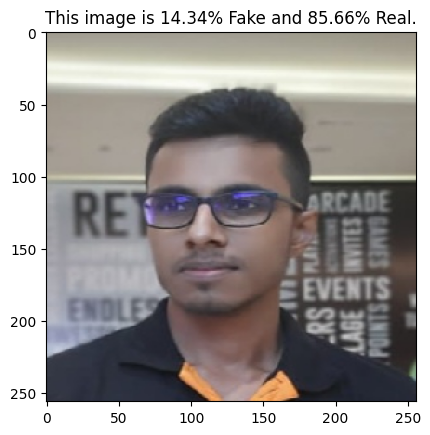

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/verityf1/Function 1 retrain_new/test/real/IMG-20240710-WA0042.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = model4.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

In [195]:
# Assuming you have defined your model as 'hybrid_model'
predicted_labels4 = model4.predict(test_ds4)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [196]:
true_labels4 = test_ds4.classes

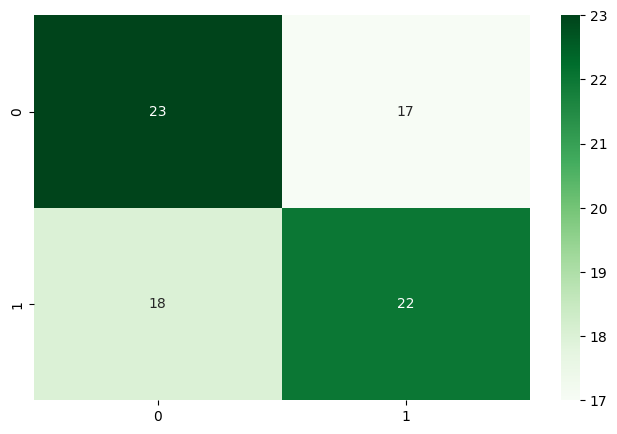

In [197]:
import seaborn as sns
from sklearn import metrics 
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels4, predicted_labels4.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

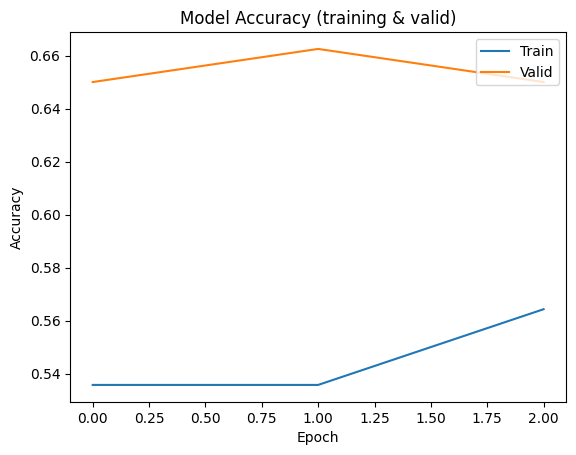

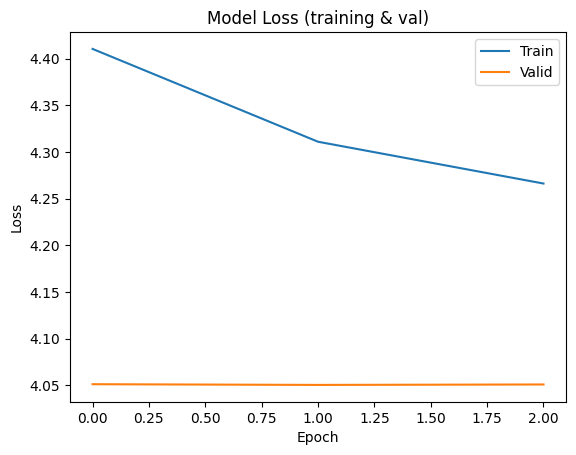

In [198]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [199]:
 model4.save('function1_retrain4.h5')